# Artificial Bee Colony (ABC) for the TSP

* **File:** ABC_algorithm_TSP.ipynb
* **Author:** Angel Sanz Gutierrez
* **Contact:** sanzangel017@gmail.com
* **GitHub:** AngelS017
* **Description:** All the code of the proyect, the study and the final conclusions
* **Version:** 1.0

This file is part of ABC algorithm for TSP, which is licensed under the MIT License.
See the LICENSE file in the project root for more information.


## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance # for euclidian distance

import ArtificialBeeColony_TSP

## Read dataset

The data that we are going to use in this proyect will be obtein from a web call [National TSP](https://www.math.uwaterloo.ca/tsp/world/countries.html) from the University of Waterloo.

This website was created to collect large-scale data on the Travel Seller Problem from different countries. In each country you can find a different number of cities which are represented with their X and Y coordinates. The **cost of traveling between cities is specified by the Euclidean distance** rounded to the nearest whole number.

In this case we are going to work with the dataset of the country Luxembourg, which conteins 980 cities but there are some cities duplicated, so in the end there are **634 cities**.

The web provides some information of the best solution provide until now for the problem, such as:
* **Optimal value (min path distance):** 11340
* **Algorithm:** concorde (default settings), QSopt LP solver
* **Time:** 1681.68 seconds, AMD Athlon 1.33 GHz

In [2]:
cities = pd.read_csv("data/lu980.tsp", sep=" ", skiprows=7, header=None, names=["Coord X", "Coord Y"])
cities = cities.iloc[:-1]
print("In our dataset there are {0} cities".format(cities.shape[0]))
cities

In our dataset there are 980 cities


,Coord X,Coord Y
1,49525.5556,5940.5556
2,49525.5556,5940.5556
3,49738.8889,6345.0000
4,49608.3333,6405.8333
5,49796.6667,6155.5556
...,...,...
976,50108.0556,5923.3333
977,49880.2778,6221.9444
978,49894.4444,6163.6111
979,49926.6667,6173.6111


## Clean dataset

In [3]:
cities_duplicated = cities.duplicated().sum()
print("Number of duplicated cities: ", cities_duplicated)

cities = cities.drop_duplicates()
cities = cities.reset_index(drop=True)
print("In our dataset there are {0} cities after delating the duplicated cities".format(cities.shape[0]))

Number of duplicated cities:  346
In our dataset there are 634 cities after delating the duplicated cities


## Create matrix distance between cities

In [4]:
distance_matrix = np.round(distance.cdist(cities, cities, 'euclidean')).astype(int)
print("Shape distance matrix: ", distance_matrix.shape)
distance_matrix

Shape distance matrix:  (634, 634)


array([[  0, 457, 473, ..., 162, 414, 402],
       [457,   0, 144, ..., 355, 208, 501],
       [473, 144,   0, ..., 332,  93, 614],
       ...,
       [162, 355, 332, ...,   0, 261, 490],
       [414, 208,  93, ..., 261,   0, 617],
       [402, 501, 614, ..., 490, 617,   0]])

## Other functions

In [5]:
def plot_path(path, cities):
    path_cities = cities.loc[path]
    plt.scatter(path_cities['Coord X'], path_cities['Coord Y'], color='red')
    plt.plot(path_cities['Coord X'], path_cities['Coord Y'], color='blue')
    plt.xlabel('Coord X')
    plt.ylabel('Coord Y')
    plt.show()
    

In [6]:
def history_best_paths_distances(paths_distances, employed_strategy, onlooker_strategy, xlabel='Iteraciones', ylabel='Best path distances', title='Evolution of path distances'):
    plt.plot(paths_distances)
    plt.scatter(np.argmin(paths_distances), np.min(paths_distances), color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend([f'Min distance: {np.min(paths_distances)}'])
    plt.text(1.05, 0.5, 
         f"Employed strategy:\n{employed_strategy}\n\n"
         f"Onlooker strategy:\n{onlooker_strategy}",
         transform=plt.gca().transAxes,
         verticalalignment='center', 
         horizontalalignment='left',
         fontsize=10,
         fontstyle='normal',
         bbox=dict(facecolor='#f0f0f0', edgecolor='gray', boxstyle='round,pad=0.5', alpha=0.9))
    plt.show

In [7]:
def plot_comparison(best_solution, other_solution):
    best_time, best_path_distance = best_solution
    time, path_distance = other_solution

    time_loss = ((time - best_time) / best_time) * 100
    distance_loss = ((path_distance - best_path_distance) / best_path_distance) * 100
    
    categories_x = ['Execution Time', 'Path Distance']
    categories_y = ['Seconds', 'Distance']
    best_values = [best_time, best_path_distance]
    other_values = [time, path_distance]
    losses = [time_loss, distance_loss]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    bar_width = 0.15
    index = np.arange(len(categories_x))
    
    # Create all bars for the data
    axes[0].bar(index[0] - bar_width/2, best_values[0], bar_width, color='darkblue', label='Best Solution')
    axes[0].bar(index[0] + bar_width/2, other_values[0], bar_width, color='dodgerblue', label='Other Solution')

    axes[1].bar(index[1] - bar_width/2, best_values[1], bar_width, color='darkblue', label='Best Solution')
    axes[1].bar(index[1] + bar_width/2, other_values[1], bar_width, color='dodgerblue', label='Other Solution')

    # Add the porcentaje of difference into other solution bar
    axes[0].text(index[0] + bar_width/2, other_values[0] + 0.05 * best_values[0], f'{losses[0]:.1f}%', ha='center', va='bottom', fontsize=12)
    axes[1].text(index[1] + bar_width/2, other_values[1] + 0.05 * best_values[1], f'{losses[1]:.1f}%', ha='center', va='bottom', fontsize=12)
    
    # Set the limints of the axe x to plot both bars in the middle
    axes[0].set_xlim(index[0] - bar_width * 3, index[0] + bar_width * 3)
    axes[1].set_xlim(index[1] - bar_width * 3, index[1] + bar_width * 3)

    for i, ax in enumerate(axes):
        ax.set_xlabel(categories_x[i])
        ax.set_ylabel(categories_y[i])
        ax.set_xticks([])
        ax.legend()

    axes[0].set_title('Execution Time Comparison')
    axes[1].set_title('Path Distance Comparison')
    
    plt.tight_layout()
    plt.show()

In [8]:
def info_training(block_size, paths_distances):
    improvements = []
    percent_improvements = []

    for block_ini in range(0, len(paths_distances)-block_size, block_size):
        block_end = block_ini + block_size

        start_distance_path = paths_distances[block_ini]
        end_distance_path = paths_distances[block_end]

        improvement_distance = start_distance_path- end_distance_path
        percentaje_improvement = (improvement_distance / start_distance_path) * 100

        print(f"Iterations {block_ini}-{block_end-1}: Improvement of {improvement_distance:.2f} units of distance "
          f"({percentaje_improvement:.2f}%)")

        improvements.append(improvement_distance)
        percent_improvements.append(percentaje_improvement)

    total_improvement = paths_distances[0] - paths_distances[-1]
    total_percent_improvement = (total_improvement / paths_distances[0]) * 100
    print(f"\nTotal improvement over the entire training: {total_improvement:.2f} units of distance "
        f"({total_percent_improvement:.2f}%)")
    
    block_indices = np.arange(len(improvements)) * block_size

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(block_indices, improvements, marker='o', color='blue')
    plt.title('Improvement by Block (Absolute)')
    plt.xlabel('Iterations')
    plt.ylabel('Improvement (units of distance)')
    plt.grid(True)
    plt.xticks(block_indices[::2])

    plt.subplot(1, 2, 2)
    plt.plot(block_indices, percent_improvements, marker='o', color='green')
    plt.title('Improvement by Block (Percentage)')
    plt.xlabel('Iterations')
    plt.ylabel('Improvement (%)')
    plt.grid(True)
    plt.xticks(block_indices[::2])

    for i, txt in enumerate(percent_improvements):
        plt.text(block_indices[i], percent_improvements[i], f'{txt:.2f}%', fontsize=7, ha='left', va='bottom')

    plt.tight_layout()
    plt.show()

In [9]:
import random
import itertools
import time
random.seed(1234)

num_cities = distance_matrix.shape[0]
other_cities = np.delete(np.arange(num_cities), 0)
random_path = np.insert(np.random.permutation(other_cities), [0, len(other_cities)], 0)

path = random_path[:]
len_path = len(path) - 2
k = 3

random_index = sorted(random.sample(range(1, len_path), k))

start = time.time()
for _ in range(10000):
    

    segments = [path[:random_index[0]+1]]
    segments.extend([path[random_index[i]+1:random_index[i+1]+1] for i in range(k-1)])
    segments.append(path[random_index[-1]+1:])

    middle_segments = [[segmento, segmento[::-1]] for segmento in segments[1:-1]]

    possible_permutations = list(itertools.product(*middle_segments)) + list(itertools.product(*middle_segments[::-1]))
    
    new_path = [np.concatenate((segments[0], *perm, segments[-1])) for perm in possible_permutations]
    new_path_1 = new_path[1:]
end = time.time()
print(end-start)
#print(new_path_1)

start = time.time()
for _ in range(10000):

    segments = [path[:random_index[0]+1]]
    segments.extend([path[random_index[i]+1:random_index[i+1]+1] for i in range(k-1)])
    segments.append(path[random_index[-1]+1:])

    middle_segments = [[segmento, segmento[::-1]] for segmento in segments[1:-1]]

    possible_permutations = list(itertools.product(*middle_segments)) + list(itertools.product(*middle_segments[::-1]))
    
    new_path = [np.concatenate((segments[0], *perm, segments[-1])) for perm in possible_permutations]
    new_path_3 = new_path[1:]
end = time.time()
print("\n", end-start)
#print(new_path_3)

print(np.array_equal(new_path_1,new_path_3))

0.10468912124633789

 0.10712528228759766
True


In [10]:
path = [1,2,3,4,5,6,7,8,9,1]
len_path = len(path) - 2
k = 4

random_index = [2,4,6,7]

segments = [path[:random_index[0]+1]]
segments.extend([path[random_index[i]+1:random_index[i+1]+1] for i in range(k-1)])
segments.append(path[random_index[-1]+1:])
print(segments)

middle_segments = [[segmento, segmento[::-1]] for segmento in segments[1:-1]]
print(middle_segments)
"""
possible_permutations = list(itertools.product(*middle_segments)) + list(itertools.product(*middle_segments[::-1]))
"""
possible_permutations = list(itertools.chain(
            itertools.product(*middle_segments),
            itertools.product(*[seg[::-1] for seg in middle_segments])
        ))

print(possible_permutations)

new_path = [np.concatenate((segments[0], *perm, segments[-1])) for perm in possible_permutations]
new_path = new_path[1:]
print(new_path)

[[1, 2, 3], [4, 5], [6, 7], [8], [9, 1]]
[[[4, 5], [5, 4]], [[6, 7], [7, 6]], [[8], [8]]]
[([4, 5], [6, 7], [8]), ([4, 5], [6, 7], [8]), ([4, 5], [7, 6], [8]), ([4, 5], [7, 6], [8]), ([5, 4], [6, 7], [8]), ([5, 4], [6, 7], [8]), ([5, 4], [7, 6], [8]), ([5, 4], [7, 6], [8]), ([5, 4], [7, 6], [8]), ([5, 4], [7, 6], [8]), ([5, 4], [6, 7], [8]), ([5, 4], [6, 7], [8]), ([4, 5], [7, 6], [8]), ([4, 5], [7, 6], [8]), ([4, 5], [6, 7], [8]), ([4, 5], [6, 7], [8])]
[array([1, 2, 3, 4, 5, 6, 7, 8, 9, 1]), array([1, 2, 3, 4, 5, 7, 6, 8, 9, 1]), array([1, 2, 3, 4, 5, 7, 6, 8, 9, 1]), array([1, 2, 3, 5, 4, 6, 7, 8, 9, 1]), array([1, 2, 3, 5, 4, 6, 7, 8, 9, 1]), array([1, 2, 3, 5, 4, 7, 6, 8, 9, 1]), array([1, 2, 3, 5, 4, 7, 6, 8, 9, 1]), array([1, 2, 3, 5, 4, 7, 6, 8, 9, 1]), array([1, 2, 3, 5, 4, 7, 6, 8, 9, 1]), array([1, 2, 3, 5, 4, 6, 7, 8, 9, 1]), array([1, 2, 3, 5, 4, 6, 7, 8, 9, 1]), array([1, 2, 3, 4, 5, 7, 6, 8, 9, 1]), array([1, 2, 3, 4, 5, 7, 6, 8, 9, 1]), array([1, 2, 3, 4, 5, 6, 7, 8, 9,

## Train ABC model

In [11]:
ini_end_city = 0

population = 50
employed_porcentaje = 0.2
onlooker_percentaje = 0.8
limit = 2000
epochs = 50000

employed_mutation_strategy = 'k_opt'    # swap, insertion, k_opt
onlooker_mutation_strategy = 'k_opt'    # swap, insertion, k_opt
k_employed = 6
k_onlooker = 6

ABC = ArtificialBeeColony_TSP.ArtificialBeeColonyOptimizer(ini_end_city, population, employed_porcentaje, limit, epochs, distance_matrix, 
                                                           employed_mutation_strategy, onlooker_mutation_strategy, k_employed, k_onlooker)

execution_time, paths_distances, final_best_path, final_best_path_distance = ABC.fit()
print(len(final_best_path))

Training Progress: 100%|██████████| 50000/50000 [16:31<00:00, 50.42epoch/s]

Params:
	(ini_end_city=0, population=50, epochs=50000, limit=2000, employed_percentage=0.2, onlooker_percentage=0.8)

Min path distance:  13932
The best path found is: 
 [  0 441 510  83 100 224 117 213 629 212 294 174 135 144 141 310 282  22
 513 190 605 483 497 240 474 109 448 168 296 591 157 498  19 597  79 203
  66 123 338 543 353 500 631 541 588 361 465 630 300 107 138 592  72 253
 531 440  29 323 603 291 176 317 136 579 385 464 622 352 564  30 527 285
 375 295 132  86 601 608 495 234  12 172 442 404 456 463 119   8  88 225
 261  99 183  57  97 229 219 198 367 159 356 271 575 493 378 417 162 226
 332 508 389  44 393 233  75 548 319  13 554 335 256  58 547 326 536 439
 557 414 454 580 246 189 249  51 115 154 351 412 517 252 396 397 193 214
 114 336 615  25 537 432 264 509 147 171  69 572 428 542 473 222 476 384
 418 315 262 220 354 409 340 286 565 298 633 260 199 594  11 204 545 516
 555 472 480  36  14 208 124 521 206 254 339 626 303  15 169  87 503 230
 573 227 505 268 140 504 36

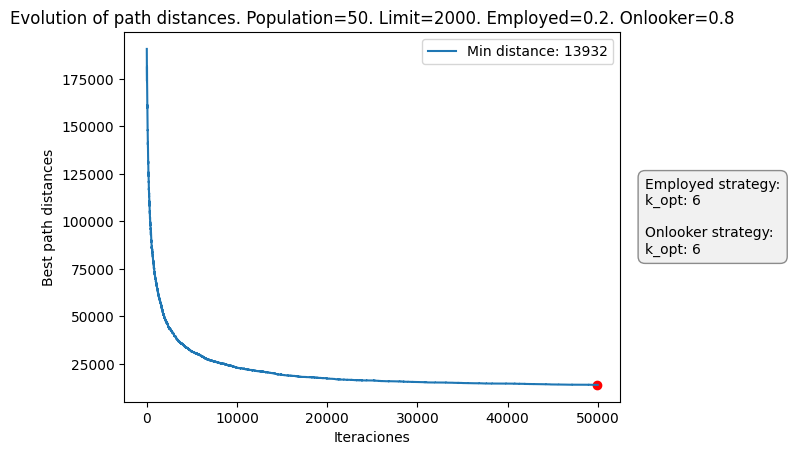

In [15]:
title = f'Evolution of path distances. Population={population}. Limit={limit}. Employed={employed_porcentaje}. Onlooker={onlooker_percentaje}'


history_best_paths_distances(paths_distances, employed_mutation_strategy + ": " + str(k_employed), onlooker_mutation_strategy+ ": " + str(k_employed), title=title)

Iterations 0-2999: Improvement of 150224.00 units of distance (78.73%)
Iterations 3000-5999: Improvement of 11259.00 units of distance (27.73%)
Iterations 6000-8999: Improvement of 4982.00 units of distance (16.98%)
Iterations 9000-11999: Improvement of 2931.00 units of distance (12.03%)
Iterations 12000-14999: Improvement of 2166.00 units of distance (10.11%)
Iterations 15000-17999: Improvement of 1239.00 units of distance (6.43%)
Iterations 18000-20999: Improvement of 1087.00 units of distance (6.03%)
Iterations 21000-23999: Improvement of 616.00 units of distance (3.64%)
Iterations 24000-26999: Improvement of 430.00 units of distance (2.64%)
Iterations 27000-29999: Improvement of 429.00 units of distance (2.70%)
Iterations 30000-32999: Improvement of 272.00 units of distance (1.76%)
Iterations 33000-35999: Improvement of 305.00 units of distance (2.01%)
Iterations 36000-38999: Improvement of 223.00 units of distance (1.50%)
Iterations 39000-41999: Improvement of 218.00 units of dist

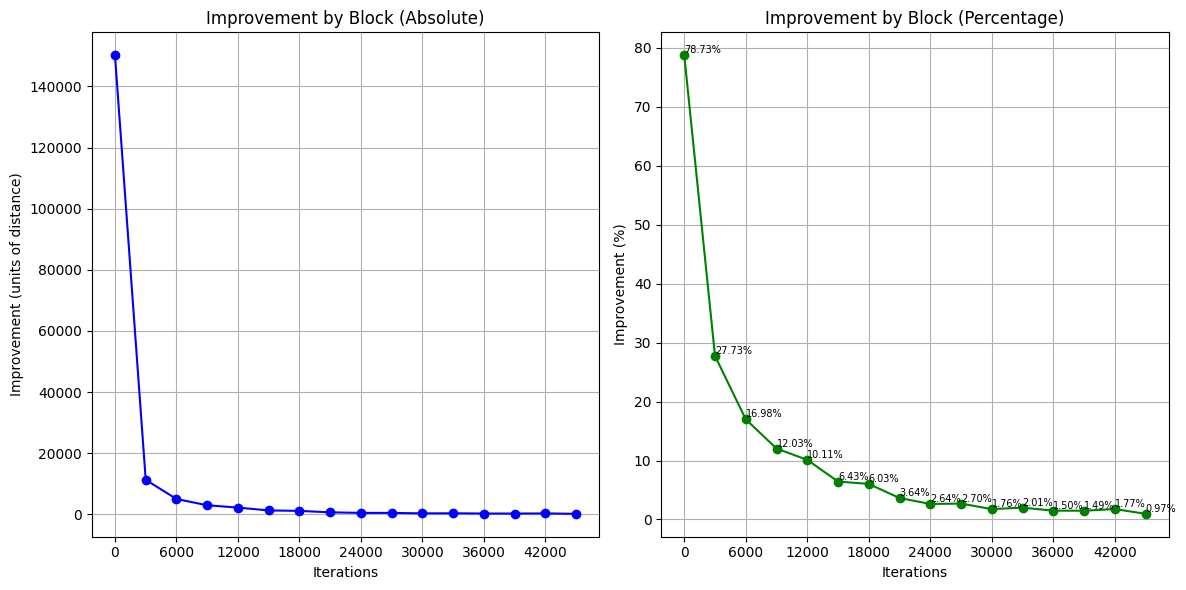

In [16]:
info_training(3000, paths_distances)

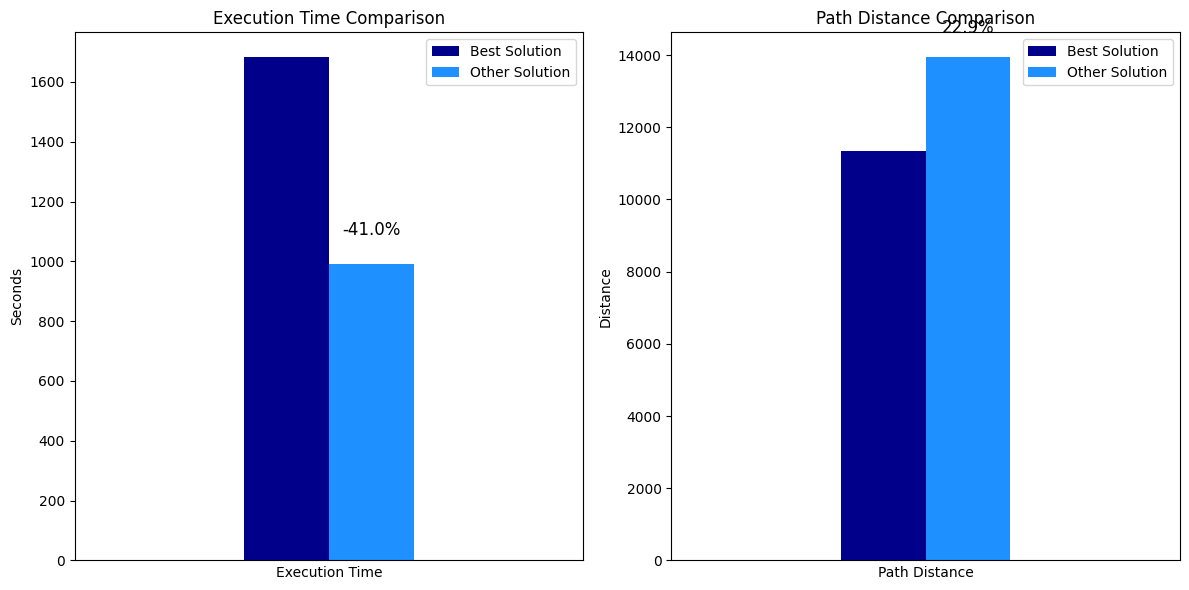

In [17]:
best_solution = [1681.68, 11340]
other_solution = [execution_time, final_best_path_distance]
plot_comparison(best_solution, other_solution)

## Find best hyper parameters

In [23]:
num_epochs = np.arange(10000, 60000, step=10000)
print(num_epochs)
populations = np.arange(25, 250, step=50)
print(populations)

[10000 20000 30000 40000 50000]
[ 25  75 125 175 225]


In [19]:
ini_end_city = 0

populations = np.arange(25, 250, step=25)
employed_porcentaje = 0.2
onlooker_percentaje = 0.8
limit = 2000
num_epochs = np.arange(10000, 60000, step=10000)

employed_mutation_strategy = 'k_opt'    # swap, insertion, k_opt
onlooker_mutation_strategy = 'k_opt'    # swap, insertion, k_opt
num_k = np.arange(4, 9)

num_experiments = len(populations) * len(num_epochs) * len(num_k)
print(f"Number of experiments: {num_experiments}")

Number of experiments: 225


In [ ]:
for population in populations:
    for epochs in num_epochs:
        for k_employed in num_k:
            k_onlooker = k_employed

            ABC = ArtificialBeeColony_TSP.ArtificialBeeColonyOptimizer(ini_end_city, population, employed_porcentaje, limit, epochs, distance_matrix, 
                                                           employed_mutation_strategy, onlooker_mutation_strategy, k_employed, k_onlooker)

            execution_time, paths_distances, final_best_path, final_best_path_distance = ABC.fit()
            
            title = f'Evolution of path distances. Population={population}. Limit={limit}. Employed={employed_porcentaje}. Onlooker={onlooker_percentaje}'
            history_best_paths_distances(paths_distances, employed_mutation_strategy + ": " + str(k_employed), onlooker_mutation_strategy+ ": " + str(k_employed), title=title)

            info_training(2000, paths_distances)

            best_solution = [1681.68, 11340]
            other_solution = [execution_time, final_best_path_distance]
            plot_comparison(best_solution, other_solution)

In [ ]:
ini_end_city = 0

population = 50
employed_porcentaje = 0.2
onlooker_percentaje = 0.8
limit = 2000
epochs = 10000

employed_mutation_strategy = 'k_opt'    # swap, insertion, k_opt
onlooker_mutation_strategy = 'k_opt'    # swap, insertion, k_opt
k_employed = 9
k_onlooker = 9


In [ ]:
history_best_paths_distances(distances_experiments, xlabel='Num experimets', ylabel='Best distance')

NameError: name 'distances_experiments' is not defined

In [ ]:
paths, paths_distances, final_best_path, final_best_path_distance = min(results_best_hiperparameters, key=lambda x: x[-1])
history_best_paths_distances(paths_distances, title='Evolution of path distances best hiperparameters version_mutate=2')

In [ ]:
# Save all best combinations
array_results_best_hiperparameters = np.array(results_best_hiperparameters, dtype=object)
np.save('All_best_results_hiperparametes_combination_mutathed_version_2.npy', array_results_best_hiperparameters)

# Save best hiperparameters combination
with open('Best_hiperparametes_combination_mutathed_version_2.txt', 'w') as f:
    f.write('Best hyper-parameters are : population=170, employed_porcentaje=0.2, onlooker_percentaje=0.8, limit=80, epochs=2200.\n')